In [109]:
## INSTALL FACEBOOK PROPHET

In [1]:
!pip install fbprophet

In [ ]:
## Import libraries

In [2]:
import pandas as pd
from fbprophet import Prophet
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
## READ DATA

In [198]:
df = pd.read_csv('kohli_t20_scores.csv',engine = 'python')

In [199]:
df

,Bat1,Wkts,Conc,Ct,St,Unnamed: 5,Opposition,Ground,Start Date,Unnamed: 9
0,26*,-,-,0,0,NaN,v�Zimbabwe,Harare,12-Jun-10,NaN
1,DNB,-,-,0,0,NaN,v�Zimbabwe,Harare,13-Jun-10,NaN
2,28,-,-,1,0,NaN,v�South Africa,Durban,9-Jan-11,NaN
3,14,-,-,2,0,NaN,v�West Indies,Port of Spain,4-Jun-11,NaN
4,4,1,22,0,0,NaN,v�England,Manchester,31-Aug-11,NaN
...,...,...,...,...,...,...,...,...,...,...
87,77*,-,-,0,0,NaN,v�England,Ahmedabad,16-Mar-21,NaN
88,1,-,-,0,0,NaN,v�England,Ahmedabad,18-Mar-21,NaN
89,80*,-,-,0,0,NaN,v�England,Ahmedabad,20-Mar-21,NaN
90,57,-,-,0,0,NaN,v�Pakistan,Dubai (DSC),24-Oct-21,NaN


In [170]:
## PRE PROCESSING

In [200]:
df = df[['Start Date','Bat1']]
df.columns = ['date','score']

In [201]:
df

,date,score
0,12-Jun-10,26*
1,13-Jun-10,DNB
2,9-Jan-11,28
3,4-Jun-11,14
4,31-Aug-11,4
...,...,...
87,16-Mar-21,77*
88,18-Mar-21,1
89,20-Mar-21,80*
90,24-Oct-21,57


In [202]:
df = df[df['score'] != 'DNB']
df = df[df['score'] != 'TDNB']
df = df.dropna()

In [203]:
df

,date,score
0,12-Jun-10,26*
2,9-Jan-11,28
3,4-Jun-11,14
4,31-Aug-11,4
5,29-Oct-11,15
...,...,...
86,14-Mar-21,73*
87,16-Mar-21,77*
88,18-Mar-21,1
89,20-Mar-21,80*


In [175]:
## Remove special characters from data

In [204]:
df['score'] = df['score'].replace('\*', '', regex=True).astype(float)

In [205]:
df

,date,score
0,12-Jun-10,26.0
2,9-Jan-11,28.0
3,4-Jun-11,14.0
4,31-Aug-11,4.0
5,29-Oct-11,15.0
...,...,...
86,14-Mar-21,73.0
87,16-Mar-21,77.0
88,18-Mar-21,1.0
89,20-Mar-21,80.0


In [206]:
df.shape

(85, 2)

In [178]:
## Creating a date column that makes sense to the Model we are fitting

In [207]:
import datetime 
tod = datetime.datetime.now()
dates = []

for i in range(df.shape[0]):
  d = datetime.timedelta(days = i)
  a = tod - d
  dates.append(a)

dates.reverse()

In [208]:
df['date'] = dates

In [209]:
df

,date,score
0,2021-08-07 16:35:58.500082,26.0
2,2021-08-08 16:35:58.500082,28.0
3,2021-08-09 16:35:58.500082,14.0
4,2021-08-10 16:35:58.500082,4.0
5,2021-08-11 16:35:58.500082,15.0
...,...,...
86,2021-10-26 16:35:58.500082,73.0
87,2021-10-27 16:35:58.500082,77.0
88,2021-10-28 16:35:58.500082,1.0
89,2021-10-29 16:35:58.500082,80.0


In [210]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [211]:
df

,date,score
0,2021-08-07,26.0
2,2021-08-08,28.0
3,2021-08-09,14.0
4,2021-08-10,4.0
5,2021-08-11,15.0
...,...,...
86,2021-10-26,73.0
87,2021-10-27,77.0
88,2021-10-28,1.0
89,2021-10-29,80.0


In [184]:
## RE NAMING COLUMNS TO MATCH WHAT THE MODEL ACCEPTS

In [212]:
df.columns = ['ds', 'y']

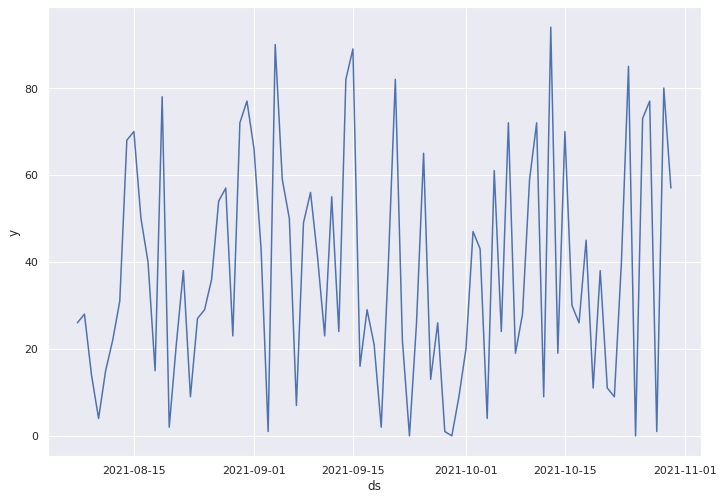

In [213]:
sns.lineplot(x = df['ds'],y = df['y'])

In [186]:
## CREATING THE TIME SERIES MODEL

In [214]:
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [188]:
## Creating a future dataframe for how many matches we want to predict score

In [215]:
future = model.make_future_dataframe(periods=4)
future

,ds
0,2021-08-07
1,2021-08-08
2,2021-08-09
3,2021-08-10
4,2021-08-11
...,...
84,2021-10-30
85,2021-10-31
86,2021-11-01
87,2021-11-02


In [ ]:
## PREDICTION TIME

In [216]:
forecast = model.predict(future)

In [ ]:
## RESULTS and ANALYSIS

In [217]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-08-07,41.184407,9.502453,77.019980
1,2021-08-08,39.098459,6.721607,71.563498
2,2021-08-09,31.099342,-0.379507,63.545433
3,2021-08-10,36.848766,3.686392,70.537395
4,2021-08-11,40.515077,9.865169,74.108305
...,...,...,...,...
84,2021-10-30,46.966458,14.144231,80.470918
85,2021-10-31,44.880511,13.085208,75.320467
86,2021-11-01,36.881393,4.765969,71.456553
87,2021-11-02,42.630817,10.201534,77.658937


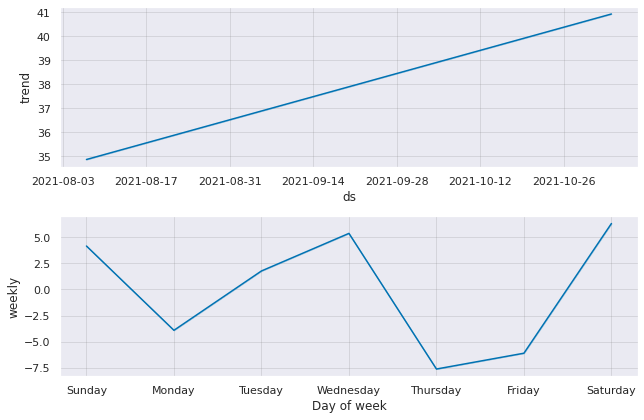

In [218]:
fig = model.plot_components(forecast)


In [219]:
predictions = pd.DataFrame()
predictions['Against'] = ['NZ','AFG','SCOTLAND','NAMIBIA']
predictions['Kohli_score'] = list(forecast.tail(4)['yhat'].astype(int))


In [ ]:
## KOHLI ICC WT20 SCORE predictions

In [220]:
predictions

,Against,Kohli_score
0,NZ,44
1,AFG,36
2,SCOTLAND,42
3,NAMIBIA,46
